In [22]:
import numpy as np
#from sklearn.datasets import load_iris, load_digits
#from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

import umap

import sys
sys.path.append('..')
from corr_methods import load_representations

# Load data

In [34]:
representations_filename_l = [
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/bert_large_cased/ptb_pos_dev.hdf5", 
#"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/openai_transformer/ptb_pos_dev.hdf5",
#"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/bert_base_cased/ptb_pos_dev.hdf5",
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/elmo_original/ptb_pos_dev.hdf5",
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/calypso_transformer_6_512_base/ptb_pos_dev.hdf5",
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/elmo_4x4096_512/ptb_pos_dev.hdf5",
"/data/sls/temp/belinkov/contextual-corr-analysis/contextualizers/xlnet_large_cased/ptb_pos_dev.hdf5"
]
layerspec_l = ["all" for x in representations_filename_l]
first_half_only_l = [False for x in representations_filename_l]
second_half_only_l = [False for x in representations_filename_l]
a = load_representations(representations_filename_l, limit=1000, layerspec_l=layerspec_l, 
                         first_half_only_l=first_half_only_l, second_half_only_l=second_half_only_l)
num_neurons_d, representations_d = a
for name in representations_d:
    print(name, representations_d[name].shape)
print(representations_d.keys())
print(list(representations_d.keys())[25])
#print(representations_d['openai_transformer-ptb_pos_dev.hdf5_6'].numpy().flatten().shape)
representations_a = [representations_d[name] for name in representations_d]
print(type(representations_a[0]))
print(representations_a[0].numpy().flatten())
representations_a = [representations.numpy().flatten() for representations in representations_a]
print(len(representations_a))
print(type(representations_a[0]))
representations_a = np.array(representations_a, dtype='float32')
print(type(representations_a))
representations_a

4it [00:02,  1.46it/s]

bert_large_cased-ptb_pos_dev.hdf5_0 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_1 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_2 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_3 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_4 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_5 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_6 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_7 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_8 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_9 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_10 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_11 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_12 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_13 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_14 torch.Size([1000, 1024])
bert_large_cased-ptb_pos_dev.hdf5_15 torch.Size([1000, 1024])
bert_large_cased-p

array([[ 0.057588  ,  0.143463  , -0.233118  , ..., -0.476547  ,
         0.536495  ,  0.147734  ],
       [-0.642156  , -0.195135  , -0.525937  , ..., -0.342514  ,
         1.194185  , -0.028162  ],
       [-0.678111  ,  0.125957  , -0.284816  , ..., -0.319928  ,
         1.076722  ,  0.471648  ],
       ...,
       [ 0.26213256,  0.31311023,  0.09826735, ..., -0.4247445 ,
         0.36423844, -0.90221554],
       [ 0.6483705 ,  0.46798313,  0.39654824, ..., -0.50654024,
         0.8912646 , -0.5108322 ],
       [ 1.7352113 ,  0.6479087 ,  0.16177091, ..., -0.4671501 ,
         1.490413  , -0.499735  ]], dtype=float32)

# Run UMAP

In [35]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(representations_a)
embedding.shape

(40, 2)

# Plot

{'bert_large_cased': 0, 'elmo_original': 1, 'calypso_transformer_6_512_base': 2, 'elmo_4x4096_512': 3}
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3]
['bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'bert_large_cased', 'elmo_original', 'elmo_original', 'elmo_original', 'calypso_transformer_6_512_base', 'calypso_transformer_6_512_base', 'calypso_transformer_6_512_base', 'calypso_transformer_6_512_base', 'calypso_transformer_6_512_base', 'calypso_transformer_6_512_base', 'calypso_transformer

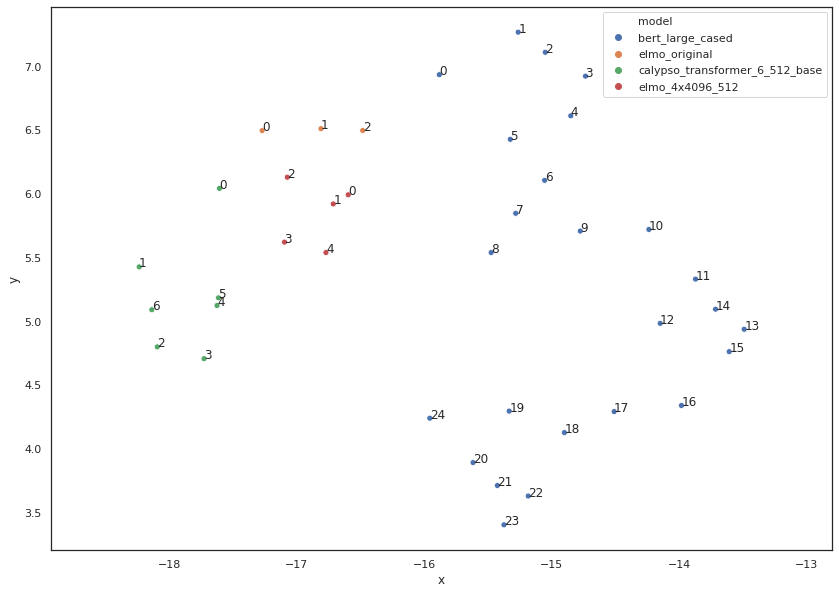

In [36]:
model_names = [name.split('-')[0] for name in representations_d]
layers = [int(name.split('_')[-1]) for name in representations_d]
model_names_unique = list(set(model_names))
name_idx_d = dict(zip(model_names_unique, range(len(model_names_unique))))
model_idx = [name_idx_d[name] for name in model_names]
print(name_idx_d)
print(model_idx)
print(model_names)


df = pd.DataFrame({'layer': layers, 'model': model_names, 
                   'x': embedding[:, 0], 'y': embedding[:, 1]})
print(df)

scatter = sns.scatterplot(x='x', y='y', hue='model', data=df)
for i, layer in enumerate(layers):
    scatter.annotate(layer, (embedding[i, 0], embedding[i, 1]))
#scatter = plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in model_idx])
plt.gca().set_aspect('equal', 'datalim')
#plt.title('UMAP projection of activations', fontsize=24);
